In [1]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib qt

import numpy as np
from numpy import *
from scipy.fft import fft, ifft, fftshift, ifftshift
from scipy.optimize import curve_fit

import os
import scipy.io as sio

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise\MarkusGainSweep'

folders = os.listdir(initial_folder)
for i in range(len(folders)):
    if ".fig" in folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', folders[i]) 

[0] -----------> DataParse.m
[1] -----------> ParsedData.mat
[2] -----------> Sweep_2024-02-09-19-52-31.mat
[3] -----------> Sweep_Fast_2024-02-14-13-29-41.mat
[4] -----------> Sweep_Fast_2024-02-16-20-27-23.mat


In [3]:
file = folders[4]
mat = sio.loadmat(initial_folder+"\\"+file)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'freqs', 'pows', 'DC', 'mag_ref', 'Gain', 'Variance'])

In [4]:
freqs = mat['freqs'][0]
print('freqs:', len(freqs))
pows = mat['pows'][0]
print('pows:', len(pows))
DC = mat['DC'][0]
print('DC:', len(DC))
gain = mat['Gain']
print('gain:', shape(gain))
vari = mat['Variance']

freqs: 76
pows: 51
DC: 51
gain: (51, 51, 76)


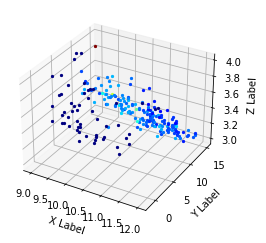

In [5]:
# %matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = np.array([]) # f
ys = np.array([]) # p
zs = np.array([]) # dc

vv = np.array([]) # dc

ref = 18
crit = 0.02

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

for f in range(len(freqs)): 
    for p in range(len(pows)): 
        for d in range(len(DC)): 
            if ref-crit< abs(gain[ d, p, f]) < ref+crit:
                xs = np.append(xs, freqs[f])
                ys = np.append(ys, pows[p])
                zs = np.append(zs, DC[d])
                vv = np.append(vv, vari[d, p, f])

cmap = plt.get_cmap('jet')
x = np.linspace(0, 1, int(len(xs))+1)
colors = cmap(x)     
control_color = -1

for f in range(len(freqs)): 
    for p in range(len(pows)): 
        for d in range(len(DC)): 
            if ref-crit< abs(gain[ d, p, f]) < ref+crit:
                V = vari[d, p, f]/max(vv)
                control_color = find_nearest(x, V)

                ax.scatter(freqs[f], pows[p], DC[d], color = colors[control_color], marker='.')
        
#                 ax.scatter(xs, ys, zs, marker='.')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

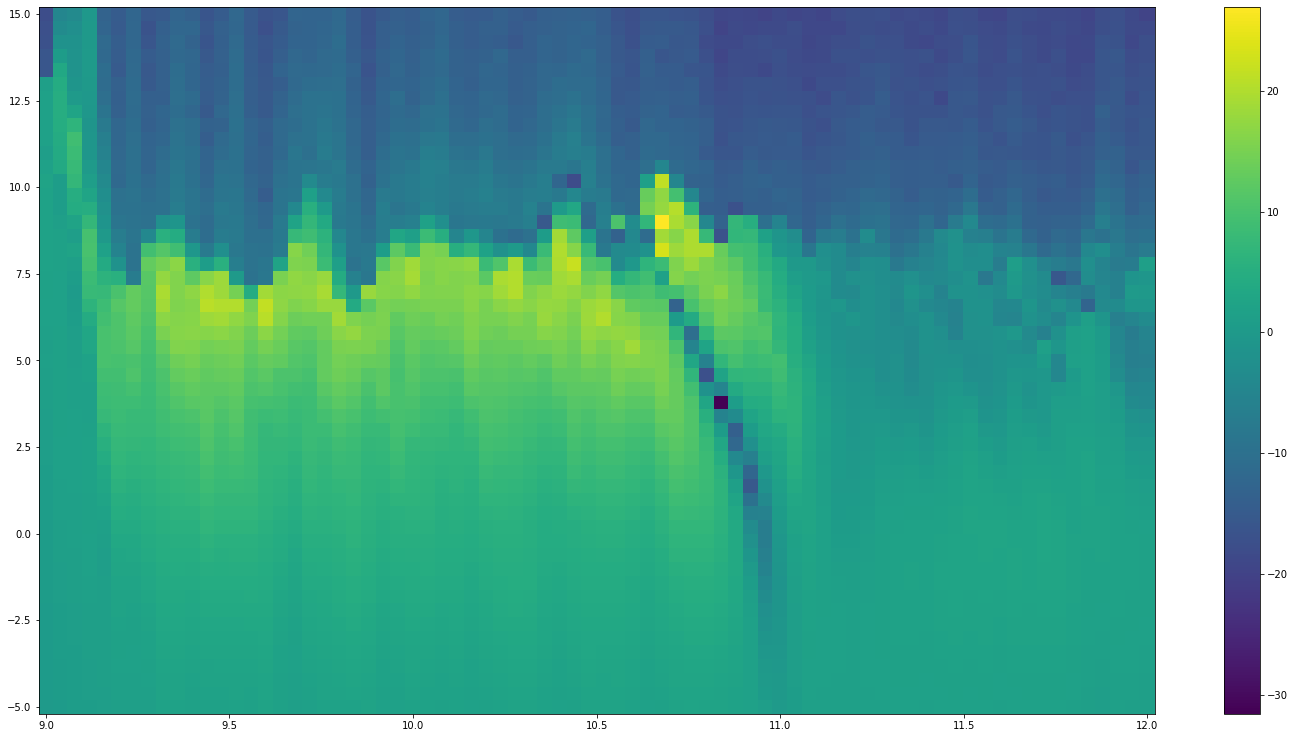

In [30]:
fig, ax = plt.subplots(figsize=(25,13))
c = ax.pcolor(freqs, pows, gain[1], cmap='viridis')
fig.colorbar(c, ax=ax)


In [85]:
DC

array([3.  , 3.02, 3.04, 3.06, 3.08, 3.1 , 3.12, 3.14, 3.16, 3.18, 3.2 ,
       3.22, 3.24, 3.26, 3.28, 3.3 , 3.32, 3.34, 3.36, 3.38, 3.4 , 3.42,
       3.44, 3.46, 3.48, 3.5 , 3.52, 3.54, 3.56, 3.58, 3.6 , 3.62, 3.64,
       3.66, 3.68, 3.7 , 3.72, 3.74, 3.76, 3.78, 3.8 , 3.82, 3.84, 3.86,
       3.88, 3.9 , 3.92, 3.94, 3.96, 3.98, 4.  ])